## 医療データのバイナリ分類

**やったこと**

Kaggleにある医療データ（乳がんのデータ）で

患者のがんが悪性なのか良性なのかをScikit-learnを使ってバイナリ分類する、

最終的に3つの異なるアルゴリズムで分類し、比較する






**データの前処理**

今回のデータは欠損値やカテゴリ変数のデータがとても少なく、
あまりデータの前処理（欠損値のデータ補填、ラベルエンコーディング等）を行う機会がなかったので
データの前処理につきましては
下記のKaggleのNotebookをご覧いただければと思います。

https://www.kaggle.com/code/smorika/beginner-with-score-0-77990-improves-step-by-step

https://www.kaggle.com/code/smorika/lightgbm-starting-from-score-0-88350-by-beginner



**データのソース**

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## 機械学習の学習と理解について

2022年の春に海外のオンライン機械学習初心者向けのワークショップに数週間参加し、

その後はKaggleのデータ等を使って自己学習を続けましたが

時系列のデータなど、普段業務で扱うことのないデータ、データ前処理の段階で

自分が苦手としている箇所が多くデータ分析の学習に集中していたため、

機械学習の自己学習は中断してしまっています

## 今回できていないこと

Matplotlib等を使ったそれぞれの変数の分析、可視化

及び可視化によるデータの外れ値、データ分布のチェック等

相関係数を見ることによっての説明変数同士の関係性や使う変数の取捨選択



## 現状での機械学習の理解

今回のようなデータがあった場合に、
特定のデータと指定されたアルゴリズムでモデルを作成し簡単なバイナリ分類や予測、
欠損値のあるデータを平均値で埋める、

分かりやすいデータであれば外れ値を調整する、
などはできるもののそれぞれのアルゴリズムをきちんと理解し、こういうデータや目的であればこのモデルを、という選定はまだ理解が足りずできていません。


またモデルの評価もConfusion Matrix, F1Score等は出せるものの

その結果を見て精度を改善するにはどうすればいいかの判断、Cross Validation分析、パラメーターのチューニングはまだ学習が足りていないと感じています。


特徴量エンジニアリングもデータやターゲット変数にどれだけ偏りがあるかなどによっていろんなやり方があることは理解していてもまだ実践的なスキルが足りていません。


## データのインポート

In [117]:
import pandas as pd
# import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('dark_background')

# import warnings
# warnings.filterwarnings('ignore')

In [118]:
ls

breast-cancer-wisconsin-data.zip  data.csv  sample_data/


In [119]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content/sample_data/'

In [120]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data
!unzip "breast-cancer-wisconsin-data.zip"

In [121]:
ls

breast-cancer-wisconsin-data.zip  data.csv  sample_data/


In [122]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## EDAと前処理





In [123]:
df.shape

(569, 33)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

不要な変数（分類に関係のない患者IDとデータが入っていない変数）の削除

In [125]:
df = df.drop(columns=['id', 'Unnamed: 32'])

欠損値は特になし

In [126]:
df.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

今回患者の乳がんを悪性か良性が判断するにあたって

目的変数となるのが　diagnosisの変数、

カテゴリ変数でM（悪性）かB（良性）になっているのでこの変数を数値変数にする

In [127]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [128]:
# make diagnosis column binary - 1(M) or 0(B)

df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [129]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

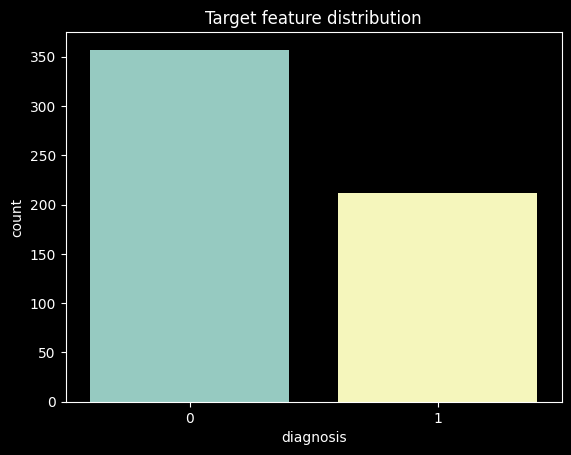

In [156]:
sns.countplot(x='diagnosis', data=df).set(title='Target feature distribution')
plt.show()

569人の患者のデータのうち、0（良性）であるものが約6割と１（悪性）よりも多い

## 最初のベンチマークとなるRandom Forestのモデル作成

まずは全ての変数をそのままでRandom Forestを使ったものをベンチマークとする

In [131]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=1)

In [132]:
X_train_full = train.drop(columns='diagnosis')
y_train_full = train['diagnosis']
X_test_full = test.drop(columns='diagnosis')
y_test_full = test['diagnosis']

In [133]:
print('len of X_train', len(X_train_full), 'len of X_test', len(X_test_full))

len of X_train 455 len of X_test 114


In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rfc_full = RandomForestClassifier()

In [136]:
rfc_full.fit(X_train_full, y_train_full)

RandomForestClassifier()

In [137]:
rfc_prediction_full = rfc_full.predict(X_test_full)

モデルの精度を確認する

In [138]:
from sklearn.metrics import confusion_matrix

rfc_cm_full = confusion_matrix(y_test_full, rfc_prediction_full)
rfc_cm_full

array([[71,  1],
       [ 5, 37]])

このConfusion Matrixから分かること

TP 71 - 実際に悪性でモデルも悪性と判断したもの

TN 37 - 実際に良性でモデルも良性と判断したもの

FP 1 - 実際は良性でモデルが悪性と判断したもの

FN 5 - 実際は悪性でモデルが良性と判断したもの

In [139]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [140]:
precision_full = precision_score(y_test_full, rfc_prediction_full)
print('precision is %.2f' % precision_full)

recall_full = recall_score(y_test_full, rfc_prediction_full)
print('recall is %.2f' % recall_full)

precision is 0.97
recall is 0.88


In [141]:
from sklearn.metrics import accuracy_score

In [142]:
accuracy_full = accuracy_score(y_test_full, rfc_prediction_full)
print('accuracy is %.2f' % accuracy_full)

accuracy is 0.95


Precisionがかなり高いのに対して、

Recall、つまり正解値がPositive(悪性）なのに対してモデルの予測がどれだけ正解していたか、

はそれほど高くはないのでAccuracyは高いものの、実際には悪性のものをそうでないと判断してしまっている


Importance of features

それぞれの変数（特徴量）がバイナリ分類するにあたってどれだけ寄与したのかを見てみる



In [143]:
features_importance = pd.Series(rfc_full.feature_importances_, index=X_train_full.columns).sort_values(ascending=False)
features_importance

radius_worst               0.132404
perimeter_worst            0.112506
area_worst                 0.108074
concave points_worst       0.107392
perimeter_mean             0.088811
concave points_mean        0.083151
concavity_mean             0.061937
concavity_worst            0.048367
area_se                    0.039077
area_mean                  0.037003
radius_mean                0.028449
compactness_mean           0.018685
texture_mean               0.018370
compactness_worst          0.016322
texture_worst              0.014905
radius_se                  0.010700
symmetry_worst             0.009073
smoothness_worst           0.008622
fractal_dimension_worst    0.007948
perimeter_se               0.007878
concavity_se               0.005492
smoothness_mean            0.005144
fractal_dimension_se       0.004995
texture_se                 0.004216
compactness_se             0.003991
symmetry_mean              0.003752
concave points_se          0.003650
smoothness_se              0

## 特徴量エンジニアリング

今回のデータでは変数名に _mean　がつくものはデータの細胞の平均をとったものとなっており、

変数名に _se　がつくものは細胞データのStandard Error、

そして変数名に _worst　がつくものは細胞データのWorstのデータをとっているので

学習させる変数を_meanがつくものだけに絞った場合に精度に変化が出るのかを検証する

In [144]:
mean_vars = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

In [145]:
mean_vars

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [146]:
X_train_mean = train[mean_vars]
y_train_mean = train['diagnosis']
X_test_mean = test[mean_vars]
y_test_mean = test['diagnosis']

In [147]:
rfc_mean = RandomForestClassifier()

In [148]:
rfc_mean.fit(X_train_mean, y_train_mean)

RandomForestClassifier()

In [149]:
rfc_prediction_mean = rfc_mean.predict(X_test_mean)

精度の確認

In [150]:
rfc_cm_mean = confusion_matrix(y_test_mean, rfc_prediction_mean)
rfc_cm_mean

array([[70,  2],
       [ 6, 36]])

In [151]:
precision_mean = precision_score(y_test_mean, rfc_prediction_mean)
print('precision is %.2f' % precision_mean)

recall_mean = recall_score(y_test_mean, rfc_prediction_mean)
print('recall is %.2f' % recall_mean)

precision is 0.95
recall is 0.86


In [152]:
accuracy_mean = accuracy_score(y_test_mean, rfc_prediction_mean)
print('accuracy is %.2f' % accuracy_mean)

accuracy is 0.93


ベンチーマークモデルの精度

precision is 0.97

recall is 0.88

accuracy is 0.95

最初のベンチマークのモデルと比べると

AccuracyとPrecisionは少し下がったものの、
Recallが少し上がっている



In [153]:
features_importance_mean = pd.Series(rfc_mean.feature_importances_, index=X_train_mean.columns).sort_values(ascending=False)
features_importance_mean

concave points_mean       0.318353
concavity_mean            0.156197
perimeter_mean            0.139699
area_mean                 0.112928
radius_mean               0.094712
texture_mean              0.077466
compactness_mean          0.048017
smoothness_mean           0.022652
symmetry_mean             0.015478
fractal_dimension_mean    0.014497
dtype: float64

## 説明変数を絞ったデータで今回は3つのアルゴリズムを試し比較する

今回はさきほどと同じデータで
MLPClassifier, SVCのアルゴリズムでもモデルを作成し、比較してみる

In [154]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [155]:
rfc = RandomForestClassifier()
mlp = MLPClassifier()
svc = SVC()

models_name = ['Random Forest', 'MLPClassifier', 'SVC']
models = [rfc, mlp, svc]

for name, model in zip(models_name, models):
  print(name)
  model.fit(X_train_mean, y_train_mean)
  prediction = model.predict(X_test_mean)
  print()

  precision = precision_score(y_test_mean, prediction)
  print('precision is %.2f' % precision)

  recall = recall_score(y_test_mean, prediction)
  print('recall is %.2f' % recall)
  accuracy = accuracy_score(y_test_mean, prediction)
  print('accuracy is %.2f' % accuracy_mean)

  cm = confusion_matrix(y_test_mean, prediction)
  print(cm)
  print('_________________________________')

Random Forest

precision is 0.97
recall is 0.88
accuracy is 0.93
[[71  1]
 [ 5 37]]
_________________________________
MLPClassifier

precision is 0.84
recall is 0.74
accuracy is 0.93
[[66  6]
 [11 31]]
_________________________________
SVC

precision is 1.00
recall is 0.67
accuracy is 0.93
[[72  0]
 [14 28]]
_________________________________


Accuracyで比較するとどのモデルの精度も同じであるものの、

SVCではPrecisionがとても高いもののRecallがかなり低く、
悪性であるものをかなりの割合で良性だと判断してしまってしまうモデルになる

MLPClassifierもRecallが低いのでこれも
正解値が悪性なものを良性と分類してしまうモデルになっている

なのでAccuracyは全て同じでもPrecisionとRecallでバランスがとれている
モデルはRandom Forestのものになる

